**Importing Necessary Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

Connection with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/Arithmea detection/dataset'

In [4]:
import os

In [5]:
os.listdir(path)

['mitbih_train.csv', 'mitbih_test.csv', 'data', 'model.png']

In [6]:
train_path='/content/drive/My Drive/Arithmea detection/dataset/mitbih_train.csv'
test_path='/content/drive/My Drive/Arithmea detection/dataset/mitbih_test.csv'

# Dataset

In [7]:
train_df=pd.read_csv(train_path,header=None)
test_df=pd.read_csv(test_path,header=None)

In [8]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)
train_df.shape

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


(87554, 188)

In [11]:
train_df[187]

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int64

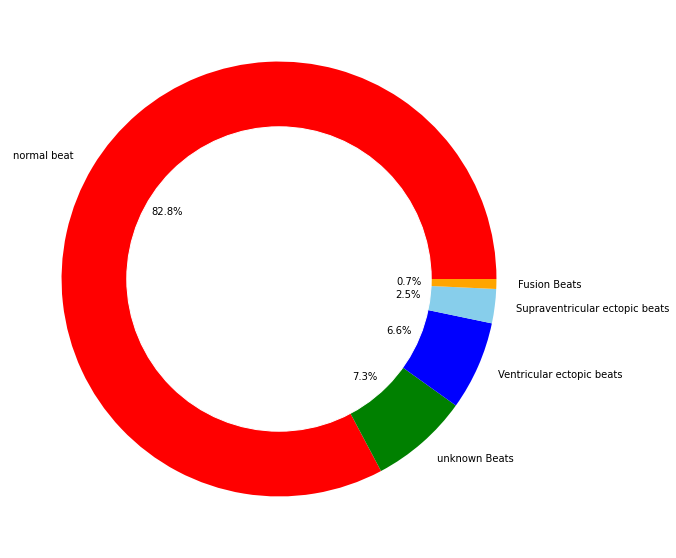

In [12]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Normalizing Dataset

In [13]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

# Upsampling

In [14]:
df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

In [15]:
train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


In [16]:
train_df.shape

(100000, 188)

In [17]:
train_df.shape

(100000, 188)

In [18]:
train_df=train_df.sample(frac=1)

In [19]:
train_df.shape

(100000, 188)

In [20]:
train_df.reset_index(drop=True, inplace=True)

In [21]:
train_df[187].head(20)

0     2
1     4
2     3
3     3
4     0
5     0
6     1
7     1
8     1
9     2
10    0
11    4
12    2
13    0
14    1
15    0
16    0
17    1
18    3
19    2
Name: 187, dtype: int64

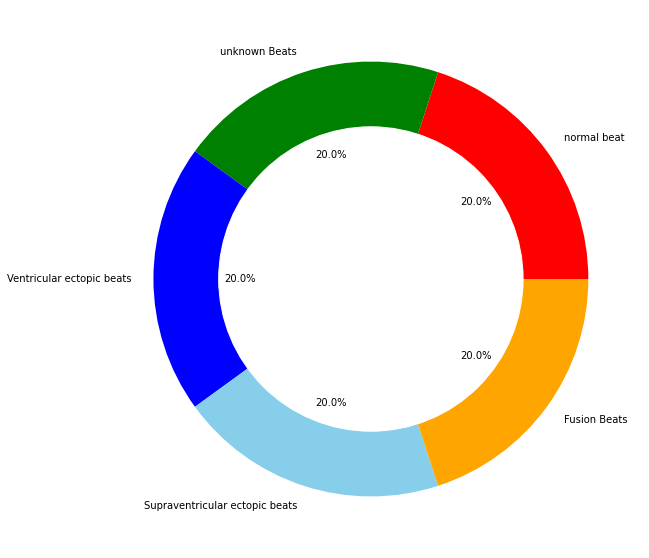

In [22]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

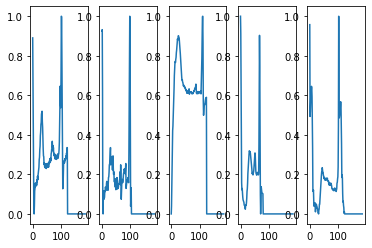

In [23]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

plt.subplot(1, 5, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.plot(c.iloc[0,:186])
plt.subplot(1, 5, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[1,:186])
plt.subplot(1, 5, 3)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[2,:186])
plt.subplot(1, 5, 4)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[3,:186])
plt.subplot(1, 5, 5)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[4,:186])

plt.show()

In [24]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


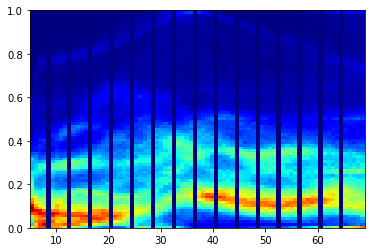

900000
900000


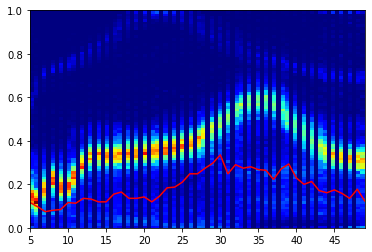

600000
600000


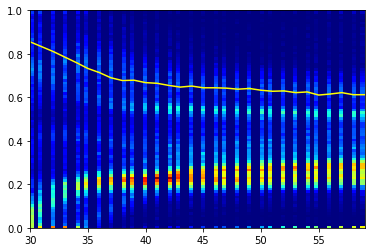

700000
700000


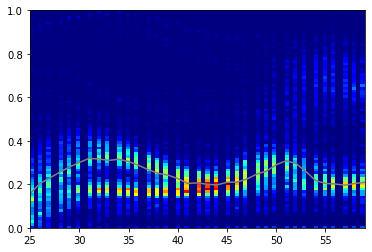

640000
640000


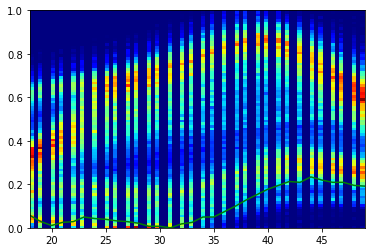

In [25]:
plot_hist(0,70,5)

plt.plot(c.iloc[1,:186],color='red')

plot_hist(1,50,5)

plt.plot(c.iloc[2,:186],color='yellow')

plot_hist(2,60,30)

plt.plot(c.iloc[3,:186],color='grey')

plot_hist(3,60,25)

plt.plot(c.iloc[4,:186],color='green')

plot_hist(4,50,18)

# Gaussian Method

In [26]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

In [27]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

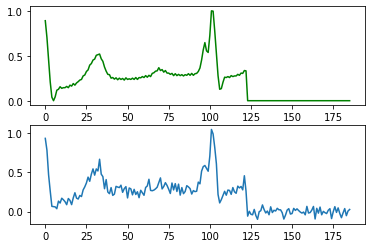

In [28]:
plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186],color='green')

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [29]:
test_df[0].value_counts()

1.000000    10008
0.000000      653
0.944444       14
0.928571       13
0.947368       12
            ...  
0.910412        1
0.979757        1
0.971129        1
0.894558        1
0.973970        1
Name: 0, Length: 8507, dtype: int64

In [30]:
train_df[0].value_counts()

1.000000    41690
0.000000     5545
0.956522       69
0.972973       65
0.897436       56
            ...  
0.985669        1
0.937656        1
0.971623        1
0.953247        1
0.944954        1
Name: 0, Length: 13853, dtype: int64

In [31]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.706731,0.600962,0.360577,0.052885,0.120192,0.110577,0.000000,0.062500,0.144231,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.700000,0.525714,0.502857,0.465714,0.460000,0.420000,0.405714,0.368571,0.351429,0.237143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,1.000000,0.794007,0.357678,0.226592,0.187266,0.170412,0.161049,0.146067,0.140449,0.129213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.825046,1.000000,0.946593,0.523020,0.281768,0.165746,0.151013,0.125230,0.116022,0.103131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.772174,0.683478,0.226087,0.000000,0.090435,0.081739,0.088696,0.078261,0.078261,0.071304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [34]:
train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
99995,0.990033,0.916944,0.418605,0.152824,0.036545,0.000000,0.019934,0.039867,0.076412,0.210963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,1.000000,0.873737,0.242424,0.025253,0.080808,0.141414,0.126263,0.166667,0.202020,0.171717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,0.881068,0.973301,0.919903,0.859223,0.866505,0.827670,0.817961,0.781553,0.628641,0.327670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,1.000000,0.940035,0.701940,0.384480,0.215168,0.084656,0.037037,0.031746,0.031746,0.035273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99999,1.000000,0.915808,0.699313,0.517182,0.457045,0.415808,0.353952,0.341924,0.343643,0.331615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [35]:
X_train=train_df.iloc[:,:187].values
X_test=test_df.iloc[:,:187].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

print(X_train.shape)
print(train_df.shape)

(100000, 187, 1)
(100000, 188)


# train and test samples

In [36]:
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'testing samples')

100000 training samples
21892 testing samples


In [57]:
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import Conv1D
from keras.layers import (Activation, Conv1D, Dense, Dropout, Flatten, MaxPooling1D)
from tensorflow.keras.layers import BatchNormalization
import keras
from tensorflow.keras import optimizers

In [38]:
# def network(X_train,y_train,X_test,y_test):
#     im_shape=(X_train.shape[1],1)
#     inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
#     conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
#     conv1_1=BatchNormalization()(conv1_1)
#     pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
#     drop = Dropout(0.2)
#     conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
#     conv2_1=BatchNormalization()(conv2_1)
#     pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
#     drop = Dropout(0.2)
#     conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
#     conv3_1=BatchNormalization()(conv3_1)
#     pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
#     drop = Dropout(0.2)
#     flatten=Flatten()(pool3)
#     dense_end1 = Dense(128, activation='relu')(flatten)
#     drop = Dropout(0.2)
#     dense_end2 = Dense(32, activation='relu')(dense_end1)
#     main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

#     model = Model(inputs= inputs_cnn, outputs=main_output)
#     model.summary()
#     model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
#     history=model.fit(X_train, y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))
#     return(model,history)

In [79]:
def network(X_train,y_train,X_test,y_test):
  model = Sequential()
  im_shape=(X_train.shape[1],1)
  model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(im_shape)))
  model.add(Dropout(0.15))
  model.add(Bidirectional(LSTM(64, return_sequences=False)))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  optimizer_new=optimizers.RMSprop(learning_rate=0.0001)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
	# fit network
  history=model.fit(X_train, y_train,epochs=15,batch_size=64,validation_data=(X_test,y_test))
  return(model,history)

In [40]:
# def network(X_train,y_train,X_test,y_test):
#   model = Sequential()
#   im_shape=(X_train.shape[1],1)
#   model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(im_shape)))
#   model.add(MaxPooling1D(pool_size=(3),strides=2, padding="same"))
#   model.add(Dropout(0.15))
  
#   model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#   model.add(MaxPooling1D(pool_size=(3),strides=2, padding="same"))
#   model.add(BatchNormalization())


#   model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#   model.add(MaxPooling1D(pool_size=(3),strides=2, padding="same"))
#   model.add(Dropout(0.15))

#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(MaxPooling1D(pool_size=(3),strides=2, padding="same"))
#   model.add(Dropout(0.15))

#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#   model.add(MaxPooling1D(pool_size=(3),strides=2, padding="same"))
#   model.add(BatchNormalization())

  
#   model.add(Flatten())
#   model.add(Dense(128, activation='relu'))
#   model.add(Dropout(0.15))
#   model.add(Dense(32, activation='relu'))
#   model.add(Dense(5, activation='softmax'))
#   optimizer_new=tf.keras.optimizers.Adam(learning_rate=1e-6)
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   model.summary()
# 	# fit network
#   history=model.fit(X_train, y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))
#   return(model,history)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    print('Test Loss:', scores[0])
    print('Test Accuracy:', scores[1])

In [60]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [80]:
model,history=network(X_train,y_train,X_test,y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 187, 128)         33792     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 187, 128)          0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                      

KeyboardInterrupt: ignored

In [69]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Accuracy: 96.19%
Test Loss: 0.12790466845035553
Test Accuracy: 0.9618582129478455


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [71]:
path1='/content/drive/My Drive/Arithmea detection/dataset'

In [72]:
data=os.path.join(path1,"data1")
try:
   os.mkdir(data)
except:
   print('file exist')

file exist


In [73]:
import tensorflow as tf

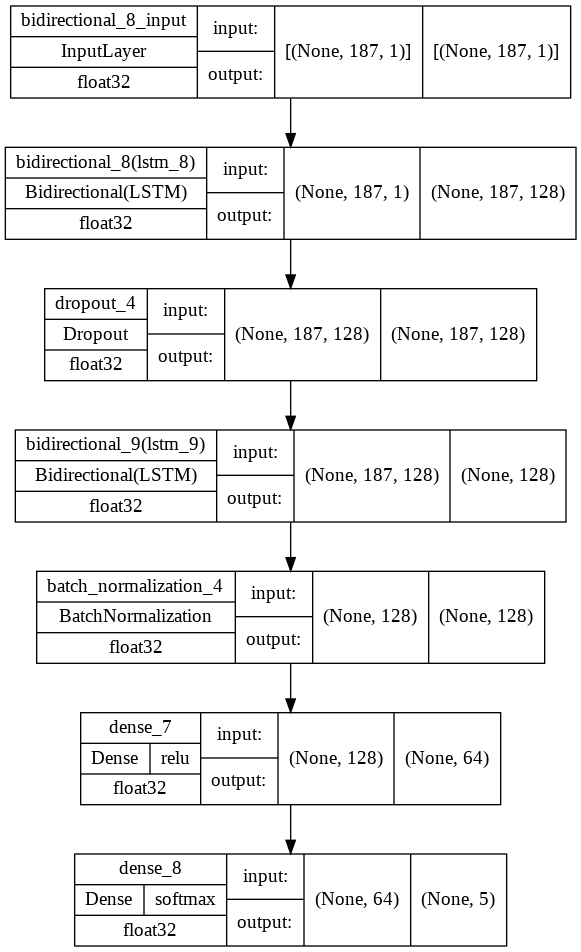

<Figure size 864x576 with 0 Axes>

In [74]:
plt.figure(figsize=(12,8))
tf.keras.utils.plot_model(model, to_file="/content/drive/My Drive/Arithmea detection/dataset/data1/model.png", 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


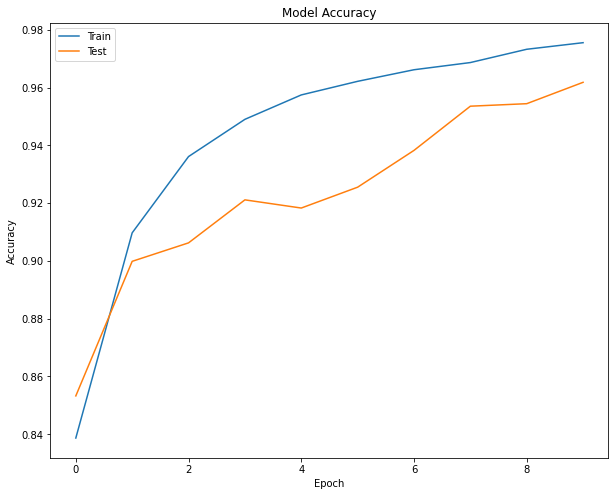

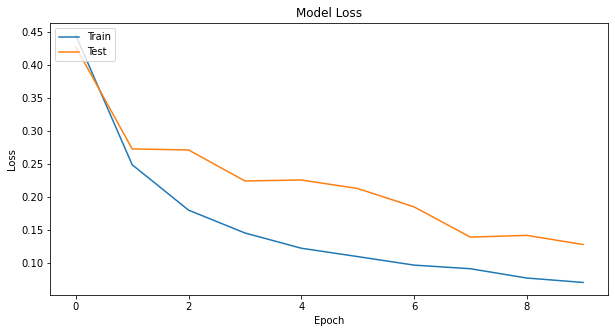

In [75]:
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.figure(figsize=(10,8))
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('/content/drive/My Drive/Arithmea detection/dataset/data1/accuracy.png')
# plt.show()

# # summarize history for loss
# plt.figure(figsize=(10,5))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('/content/drive/My Drive/Arithmea detection/dataset/data1/loss.png')
# plt.show()


In [76]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    print('Test Loss:', scores[0])
    print('Test Accuracy:', scores[1])

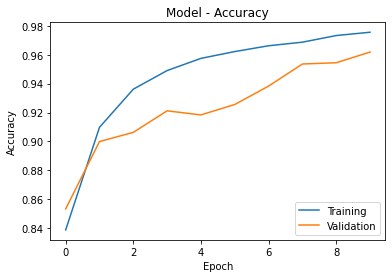

<Figure size 432x288 with 0 Axes>

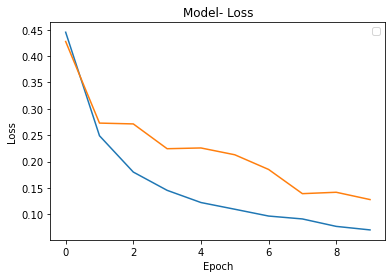

<Figure size 432x288 with 0 Axes>

In [78]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
plt.savefig('/content/drive/My Drive/Arithmea detection/dataset/data1/accuracy_a.png')
    
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.savefig('/content/drive/My Drive/Arithmea detection/dataset/data1/loss_a.png')
target_names=['0','1','2','3','4']
    
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)
cnf_matrix = confusion_matrix(y_true, prediction)

In [81]:
print(y_pred) 
print("Result from real time data included in testing dataset:")
Y_pred_classes = np.argmax(y_pred,axis = 1) 
print(Y_pred_classes[0])

[[9.9999964e-01 3.7247489e-07 2.7784738e-11 4.5156734e-12 8.8392848e-16]
 [9.9544132e-01 4.4901036e-03 6.4866763e-05 2.8159216e-06 9.3731791e-07]
 [9.9569041e-01 4.3087923e-03 3.0448629e-08 4.3451840e-07 3.4180763e-07]
 ...
 [1.9780372e-03 1.5109401e-05 3.0019174e-03 5.0877890e-05 9.9495405e-01]
 [2.1112055e-07 1.9710483e-06 9.3679586e-07 6.1940622e-13 9.9999690e-01]
 [2.0840587e-07 1.4075091e-06 2.9975990e-06 7.5747075e-13 9.9999535e-01]]
Result from real time data included in testing dataset:
0


In [82]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import itertools

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

Normalized confusion matrix


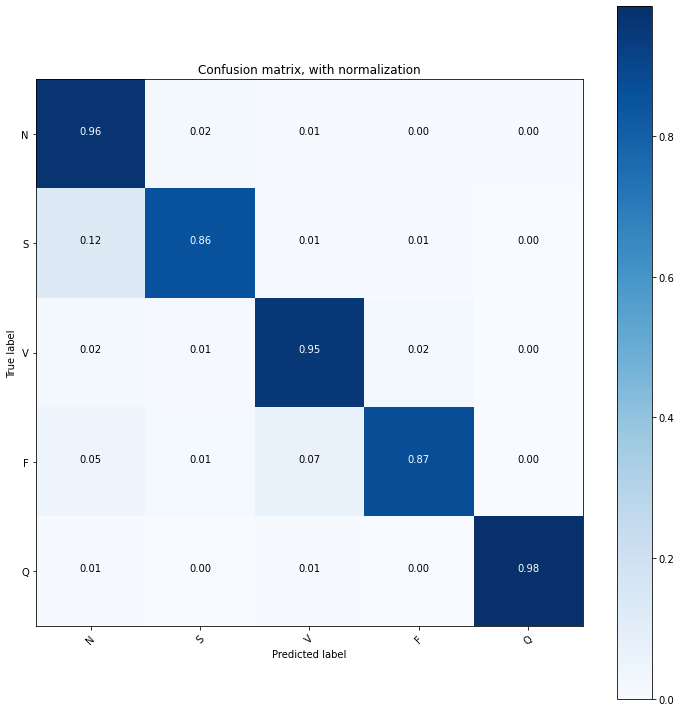

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
plt.savefig('/content/drive/My Drive/Arithmea detection/dataset/data1/cm_a(96.19).png')